<a href="https://colab.research.google.com/github/khushi642/california-housing-prediction/blob/main/california_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
!pip install scikit-learn


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
!pip install seaborn


In [20]:
import seaborn as sns


In [51]:
from sklearn.datasets import fetch_california_housing

var = fetch_california_housing(as_frame=True)
X = var.data  # Features (input data)
y = var.target  # Target variable (housing prices)


In [23]:
!pip install scikit-learn


In [52]:
from pandas.core.indexers.objects import VariableOffsetWindowIndexer
VariableOffsetWindowIndexer = fetch_california_housing(as_frame=True)

# Access the keys of the data dictionary
print(var.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [55]:
X = var['data']  # Features (input data)
y = var['target']  # Target variable (housing prices)
description = var['DESCR']  # Description of the dataset

In [56]:
print(var.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [57]:
print(var.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [58]:
print(var.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [59]:
print(var.data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
# Print the dataset description (DESCR)
#print(var.DESCR)

# Print the feature names
#print(var.feature_names)

# Print the target variable (housing prices)
#print(var.target)

# Print the data (features)
#print(var.data)

In [66]:
df = pd.DataFrame(var.data, columns=var.feature_names)
print(df)
df.head()

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [67]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [68]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [73]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

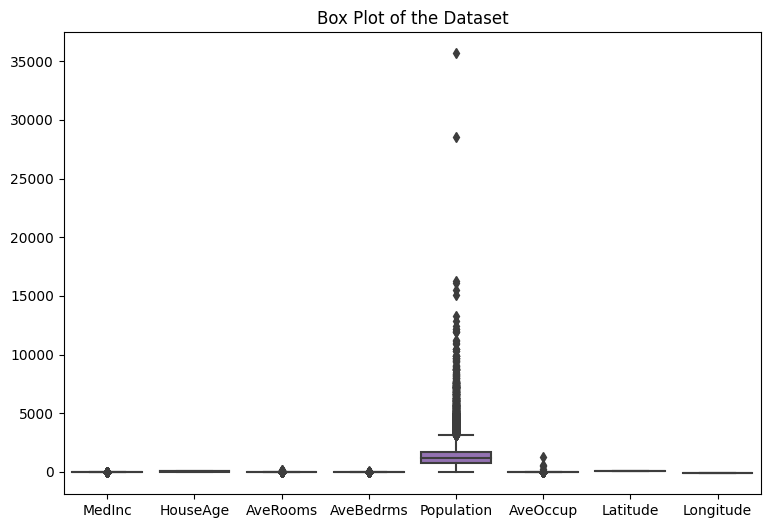

In [75]:
# Set the size of the plot
plt.figure(figsize=(9, 6))

# Create the box plot
sns.boxplot(data=df)

# Add a title to the plot
plt.title('Box Plot of the Dataset')

# Show the plot
plt.show()


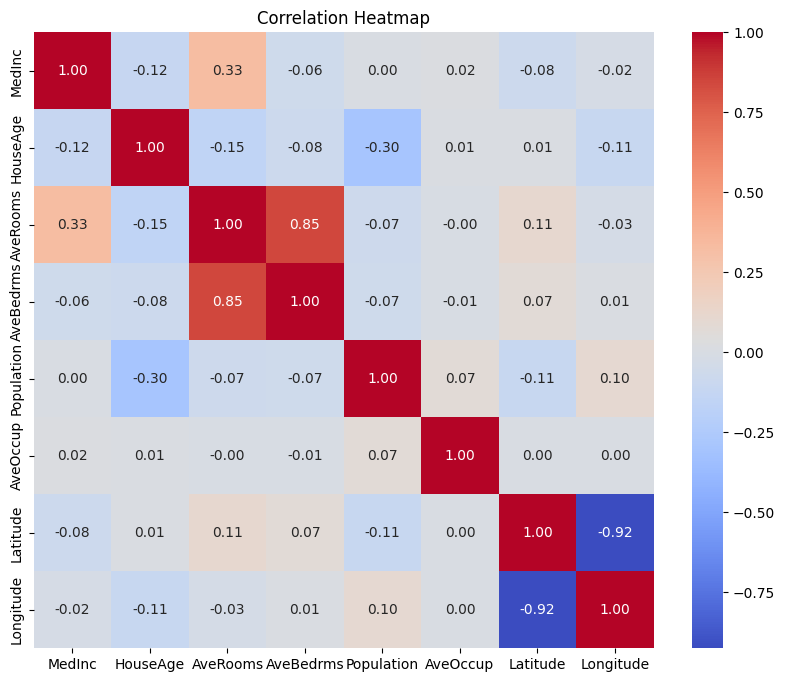

In [76]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


<ipython-input-82-c1dbcec173aa>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['MedInc'], shade=True)
<ipython-input-82-c1dbcec173aa>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['HouseAge'], label='HouseAge', shade=True)
<ipython-input-82-c1dbcec173aa>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['AveRooms'], label='AveRooms', shade=True)
<ipython-input-82-c1dbcec173aa>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['AveBedrms'], label='AveBedrms', shade=

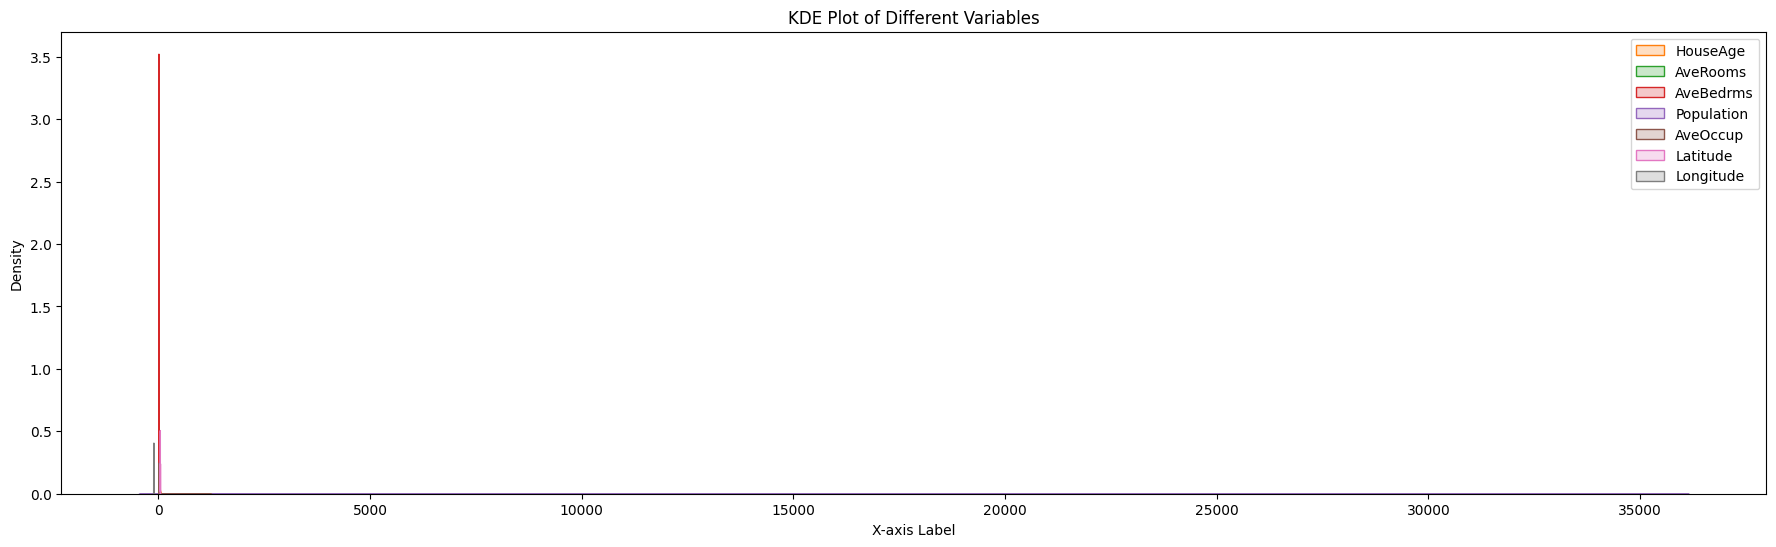

In [82]:
# Set the size of the plot
plt.figure(figsize=(22, 6))

# Create KDE plots for different variables
sns.kdeplot(data=df['MedInc'], shade=True)
sns.kdeplot(data=df['HouseAge'], label='HouseAge', shade=True)
sns.kdeplot(data=df['AveRooms'], label='AveRooms', shade=True)
sns.kdeplot(data=df['AveBedrms'], label='AveBedrms', shade=True)
sns.kdeplot(data=df['Population'], label='Population', shade=True)
sns.kdeplot(data=df['AveOccup'], label='AveOccup', shade=True)
sns.kdeplot(data=df['Latitude'], label='Latitude', shade=True)
sns.kdeplot(data=df['Longitude'], label='Longitude', shade=True)

# Add a title and labels to the plot
plt.title('KDE Plot of Different Variables')
plt.xlabel('X-axis Label')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [3]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)

# Convert the dataset to a DataFrame
bdf = data.frame

# Access the columns
x1 = bdf[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']]
y1 = bdf['Population']


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size =0.33,random_state = 5 )

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

       Actual    Predicted
14772  1224.0  2138.901588
10105  1590.0  1867.338476
20094   416.0   135.915191
19261  1644.0  1581.402630
14139  1263.0  1580.923953
...       ...          ...
11853   965.0   329.194999
589    1444.0  1372.096055
4132   1433.0   848.796261
12580  2611.0  1485.738088
2173   1274.0  1976.001433

[6812 rows x 2 columns]


In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 658.7012559568886
Mean Squared Error: 1248025.6787534049
Root Mean Squared Error: 1117.1506965281833
R-squared: 0.10717115713653136


Slope (m): -26.853550470638822
Intercept (b): 2200.050890247852


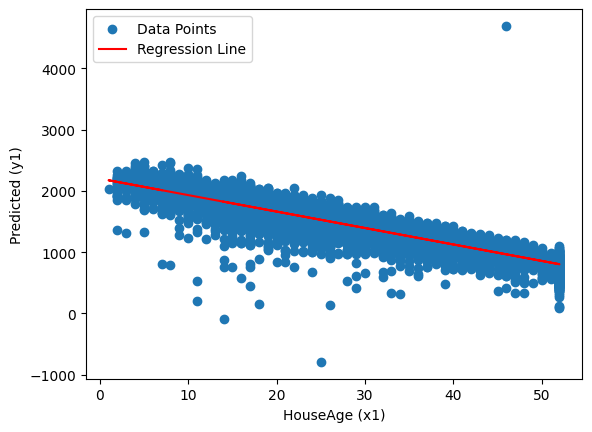

In [14]:
from matplotlib import pyplot as plt
x1 = np.array(x_test['HouseAge'])
y1 = np.array(y_pred)

# Fit a linear regression line using polyfit()
m, b = np.polyfit(x1, y1, deg=1)

# Print the slope and intercept of the regression line
print("Slope (m):", m)
print("Intercept (b):", b)

# Plot the original data and the regression line
plt.scatter(x1, y1, label='Data Points')
plt.plot(x1, m*x1 + b, color='red', label='Regression Line')
plt.xlabel('HouseAge (x1)')
plt.ylabel('Predicted (y1)')
plt.legend()
plt.show()

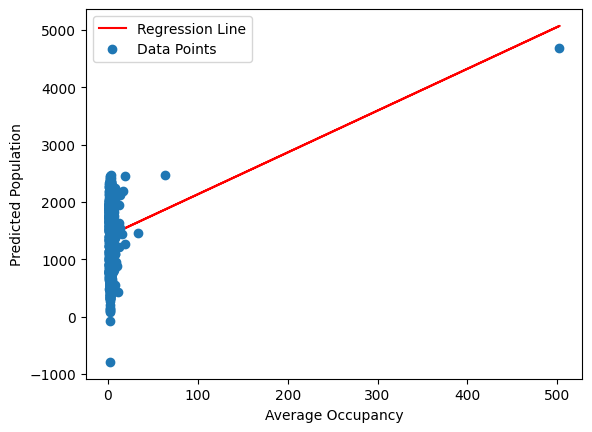

In [17]:
from matplotlib import pyplot as plt

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
bdf = data.frame

# Access the columns
X1 = bdf[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']]
Y1 = bdf['Population']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33, random_state=5)

# Create and fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(x_test)

# Convert the arrays to NumPy arrays
x1 = np.array(x_test['AveOccup'])
y1 = np.array(y_pred)

# Fit a linear regression line using polyfit()
m, b = np.polyfit(x1, y1, deg=1)

# Plot the regression line and data points
plt.plot(x_test['AveOccup'], m * x_test['AveOccup'] + b, color='red', label='Regression Line')
plt.plot(x_test['AveOccup'], y_pred, 'o', label='Data Points')
plt.xlabel("Average Occupancy")
plt.ylabel("Predicted Population")
plt.legend()
plt.show()

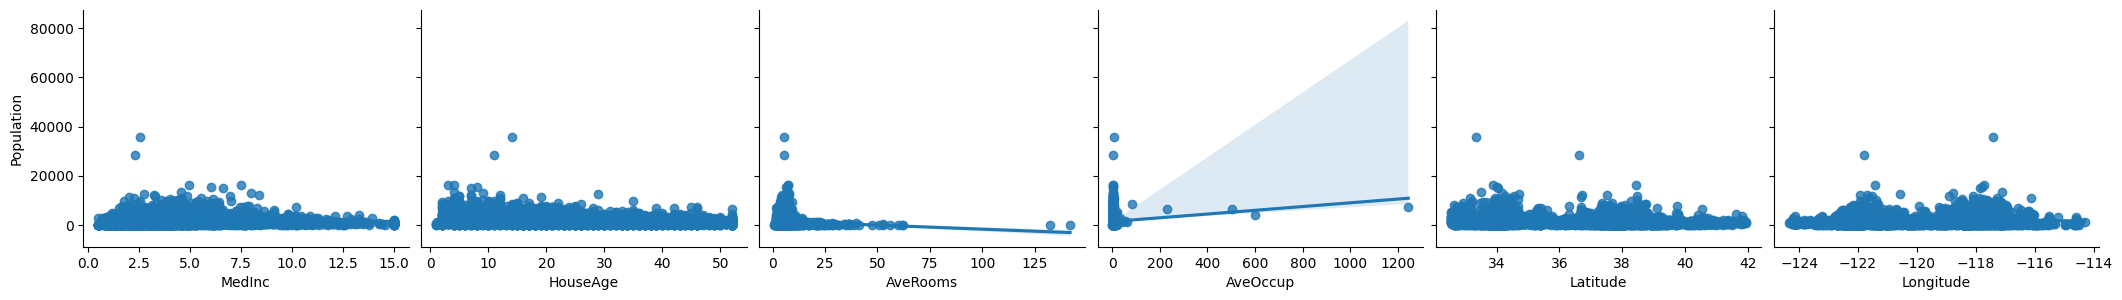

In [20]:
import seaborn as sns
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
target_variable = 'Population'

# Create a pairplot using Seaborn
sns.pairplot(bdf, x_vars=selected_features, y_vars=target_variable, height=3, aspect=1.2, kind='reg')

# Show the plot
plt.show()